Homework 7 for linear regression and scaling

Use the Seaborn dataset you are interested.

You can use the get_dataset_names() -function to view  name of all the datasets.

Tasks:

Load a dataset in Pandas DataFrame and apply linear regression to it in order to find relation between independent data (X) and one dependent variable (y). Show the graph of the result. 2 points.
Select one variable from the dataset and apply scaling with both standardization and normalization for it. Show the data values before and after scaling. 1 point.
Present results of scaling also with graphs similar like in class assignments. 1 point.
Return your answer in HTML format (Jupyter Notebook coverted to HTML).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Loading the planets csv

df = sns.load_dataset("planets")

In [23]:
# Keeping only needed columns for this homework

df = df[['mass', 'distance', 'orbital_period']].dropna().copy()

print("\nData after dropping NAs:")
display(df.head())
print(df.describe())


Data after dropping NAs:


,mass,distance,orbital_period
0,7.10,77.40,269.300
1,2.21,56.95,874.774
2,2.60,19.84,763.000
3,19.40,110.62,326.030
4,10.50,119.47,516.220


             mass    distance  orbital_period
count  498.000000  498.000000      498.000000
mean     2.509320   52.068213      835.778671
std      3.636274   46.596041     1469.128259
min      0.003600    1.350000        1.328300
25%      0.212500   24.497500       38.272250
50%      1.245000   39.940000      357.000000
75%      2.867500   59.332500      999.600000
max     25.000000  354.000000    17337.500000


In [8]:
# Linear Regression for mass and orbital_period

X = df[['mass']].values
y = df['orbital_period'].values
lin = LinearRegression()
lin.fit(X, y)

slope = lin.coef_[0]
intercept = lin.intercept_
r2 = lin.score(X, y)

print("\nSimple Linear Regression (mass → orbital_period)")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r2:.4f}")


Simple Linear Regression (mass → orbital_period)
Slope: 74.7058
Intercept: 648.3178
R²: 0.0342


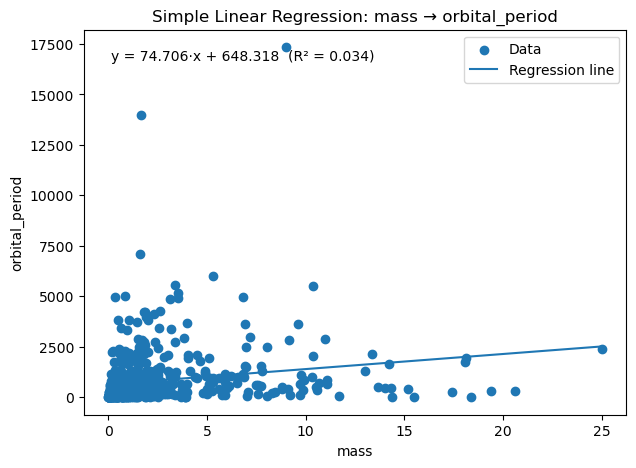

In [17]:
# Making and scatter and regression line plot

plt.rcParams["figure.figsize"] = (7, 5)
plt.figure()
plt.scatter(X, y, label="Data")
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line = lin.predict(x_line)
plt.plot(x_line, y_line, label="Regression line")
plt.xlabel("mass")
plt.ylabel("orbital_period")
plt.title("Simple Linear Regression: mass → orbital_period")
eq_text = f"y = {slope:.3f}·x + {intercept:.3f}  (R² = {r2:.3f})"

# Adding the equation top left

plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes, va='top')
plt.legend()
plt.show()

In [18]:
# Scalling one variable, distance here

distance = df['distance'].values.reshape(-1, 1)

In [19]:
# Doing the standardization for the z - score

std_scaler = StandardScaler()
distance_z = std_scaler.fit_transform(distance).ravel()

In [20]:
# MinMax normalization (0-1)

mm_scaler = MinMaxScaler()
distance_01 = mm_scaler.fit_transform(distance).ravel()

In [21]:
# Showing the first 20 rows afetr scalling

scaling_preview = pd.DataFrame({
    'distance_original': distance.ravel(),
    'distance_standardized(z)': distance_z,
    'distance_normalized(0-1)': distance_01
})
print("\nFirst 20 rows: distance before and after scaling")
display(scaling_preview.head(20))


First 20 rows: distance before and after scaling


,distance_original,distance_standardized(z),distance_normalized(0-1)
0,77.40,0.544193,0.215653
1,56.95,0.104874,0.157663
2,19.84,-0.692347,0.052432
3,110.62,1.257846,0.309854
4,119.47,1.447968,0.334950
5,76.39,0.522496,0.212789
6,18.15,-0.728652,0.047639
7,73.10,0.451818,0.203460
8,74.79,0.488124,0.208252
9,74.79,0.488124,0.208252


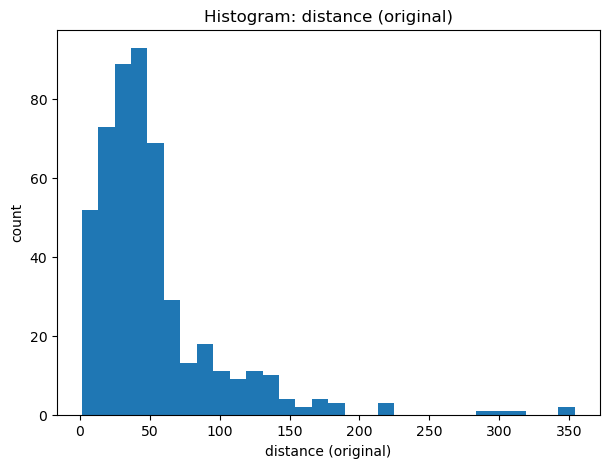

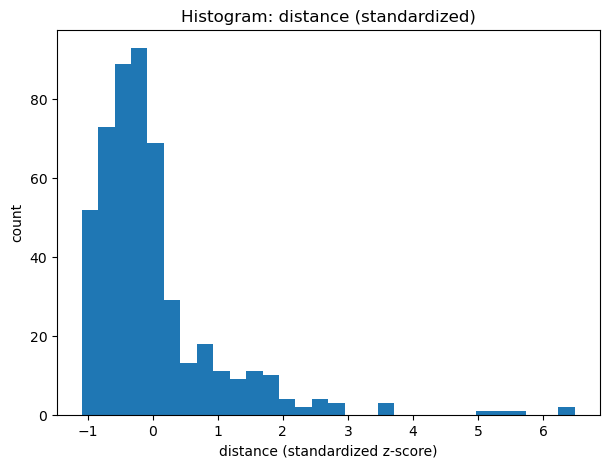

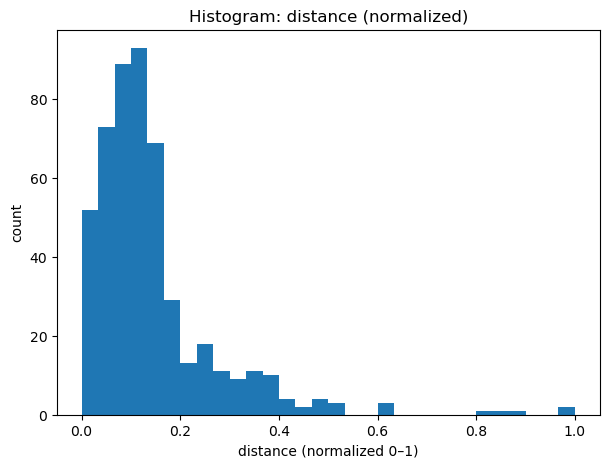

In [22]:
# Visualising the results to compare

# Original

plt.figure()
plt.hist(distance.ravel(), bins=30)
plt.xlabel("distance (original)")
plt.ylabel("count")
plt.title("Histogram: distance (original)")
plt.show()

# Standardized

plt.figure()
plt.hist(distance_z, bins=30)
plt.xlabel("distance (standardized z-score)")
plt.ylabel("count")
plt.title("Histogram: distance (standardized)")
plt.show()

# Normalized

plt.figure()
plt.hist(distance_01, bins=30)
plt.xlabel("distance (normalized 0–1)")
plt.ylabel("count")
plt.title("Histogram: distance (normalized)")
plt.show()